In [1]:
import sys
sys.path.append('funcs/')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from puppy import AOIDrawer

# Create AOIs for an image
background_img = 'G:/My Drive/Projects/OSF_Scene Meaning & MW/stimuli/after_sun_asrhohyqzajswxsa.jpg'

from PIL import Image
background_img = np.asarray(Image.open(background_img))

# Create and run the drawer
drawer = AOIDrawer(screen_dims=(1024, 768), stimuli=background_img, stimuli_name='after_sun_asrhohyqzajswxsa.jpg')
drawer.run(debug=True, jupyter_mode='inline')

In [3]:
#fix = pd.read_csv('/Users/HanZhang/Library/CloudStorage/GoogleDrive-hanzh@umich.edu/My Drive/Projects/OSF_Scanpath during MW/Data/raw_fixation_data.csv')
fix = pd.read_csv('G:/My Drive/Projects/OSF_Scanpath during MW/Data/raw_fixation_data.csv')

In [4]:
fix = fix.dropna(subset=['x_pos', 'y_pos'])

In [23]:
from puppy import FixationViewer

pic_path = '/Users/HanZhang/Library/CloudStorage/GoogleDrive-hanzh@umich.edu/My Drive/Projects/OSF_Scene Meaning & MW/stimuli/'
pic_path = 'G:/My Drive/Projects/OSF_Scene Meaning & MW/stimuli/'

# Create visualizer
viz = FixationViewer(
    data=fix,  # your fixation dataframe
    screen_dims = (1024, 768),
    stimuli_path = pic_path,
    col_mapping={
        'trial_id': ['subject_nr', 's_name'],  # List of columns that identify a trial
        'x': 'x_pos',  # x coordinate column name
        'y': 'y_pos',  # y coordinate column name
        #'duration': 'duration',  # duration column name
        'timestamp': 'level_1' , # timestamp column name
        'stimuli': 's_name'  # uncomment if you have stimuli images
    }
)

 # nested AOIs
aois = {
    'after_IMG_0213.jpg': {
        'face': [(100, 100), (200, 100), (200, 200), (100, 200)],
        'text': [(300, 300), (400, 300), (400, 400), (300, 400)]
    },
    'after_IMG_0626.jpg': {
        'face': [(600, 600), (700, 600), (700, 700), (600, 700)],
        'text': [(350, 350), (450, 350), (450, 450), (350, 450)]
    }
}

aois = {
    'face': [(100, 100), (200, 100), (200, 200), (100, 200)],
    'text': [(300, 300), (400, 300), (400, 400), (300, 400)]
}

# Set AOIs if needed
viz.set_aois(aois)

# Run the server
viz.run(port=8080)

No duration column specified. Fixation duration will not be displayed.
Assuming AOIs are the same for all stimuli.


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Areas of Interest (AOIs)'}>)

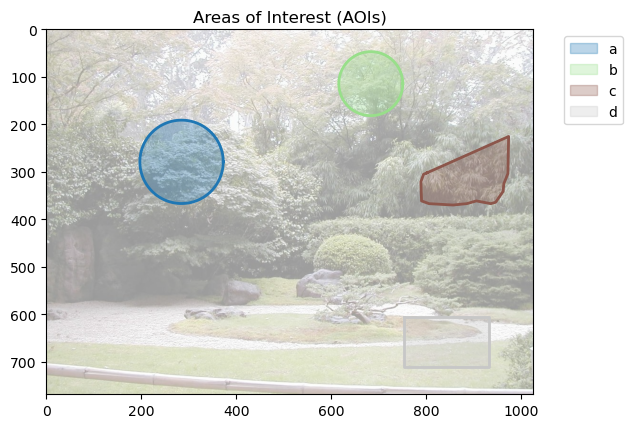

In [9]:
from puppy import draw_aois, draw_scanpath, draw_heatmap

path = 'G:/My Drive/Projects/OSF_Scene Meaning & MW/stimuli/after_sun_asrhohyqzajswxsa.jpg'

# generate a random background image
import numpy as np
background_img = np.random.randint(0, 255, (768, 1024, 3))
aois = {
    'face': [(100, 100), (200, 100), (200, 200), (100, 200)],
    'text': [(300, 300), (400, 300), (400, 400), (300, 400)]
}

import json
with open('after_sun_asrhohyqzajswxsa.jpg_aois.json', 'r') as f:
    aois = json.load(f)


draw_aois(aois, screen_dims=(1024, 768), background_img=path)

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'Scanpath'}>)

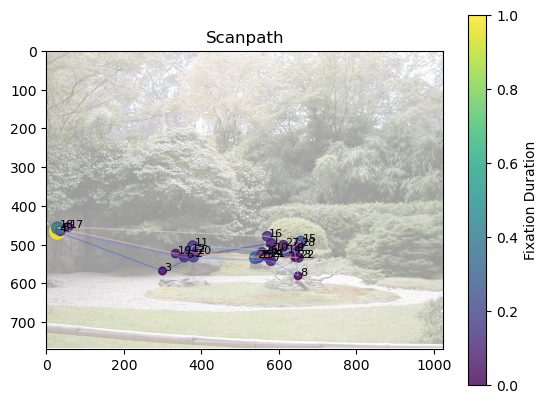

In [10]:
plot_data = fix.query('subject_nr == 43 and s_name == "after_sun_asrhohyqzajswxsa.jpg"')

draw_scanpath(x=plot_data['x_pos'], y=plot_data['y_pos'], screen_dims=(1024, 768), durations=plot_data['duration'], background_img=path)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Fixation Density Heatmap'}>)

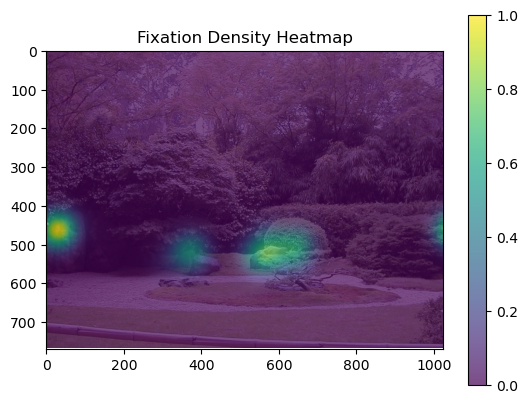

In [11]:
draw_heatmap(x=plot_data['x_pos'], y=plot_data['y_pos'], screen_dims=(1024, 768), durations=plot_data['duration'], background_img=path)

In [12]:
from puppy.aoi import get_fixation_aoi, compute_aoi_statistics

test_df = fix.query('subject_nr == 43 and s_name == "after_sun_asrhohyqzajswxsa.jpg"')
test_df['aoi'] = get_fixation_aoi(test_df['x_pos'], test_df['y_pos'], aois)
test_df

C:\Users\Hans Cheng\AppData\Local\Temp\ipykernel_6564\2178732208.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,s_name,level_1,name,eye,last_onset,duration,x_pos,y_pos,p_size,subject_nr,attention,Attention,pic_block,aoi
33525,after_sun_asrhohyqzajswxsa.jpg,1988721.0,EFIX,R,1988941.0,222.0,580.4,496.6,293.0,43,On-task,On-task,Natural Scenes,None
33526,after_sun_asrhohyqzajswxsa.jpg,1988985.0,EFIX,R,1989337.0,354.0,379.4,530.9,244.0,43,On-task,On-task,Natural Scenes,None
33527,after_sun_asrhohyqzajswxsa.jpg,1989367.0,EFIX,R,1989469.0,104.0,299.8,567.8,244.0,43,On-task,On-task,Natural Scenes,None
33528,after_sun_asrhohyqzajswxsa.jpg,1989515.0,EFIX,R,1990999.0,1486.0,28.0,466.5,267.0,43,On-task,On-task,Natural Scenes,None
33529,after_sun_asrhohyqzajswxsa.jpg,1991011.0,EFIX,R,1991239.0,230.0,36.4,464.5,295.0,43,On-task,On-task,Natural Scenes,None
33530,after_sun_asrhohyqzajswxsa.jpg,1991289.0,EFIX,R,1991489.0,202.0,355.8,532.6,284.0,43,On-task,On-task,Natural Scenes,None
33531,after_sun_asrhohyqzajswxsa.jpg,1991675.0,EFIX,R,1991895.0,222.0,579.8,541.8,239.0,43,On-task,On-task,Natural Scenes,None
33532,after_sun_asrhohyqzajswxsa.jpg,1992139.0,EFIX,R,1992233.0,96.0,649.6,580.4,231.0,43,On-task,On-task,Natural Scenes,None
33533,after_sun_asrhohyqzajswxsa.jpg,1992257.0,EFIX,R,1992505.0,250.0,641.0,515.1,238.0,43,On-task,On-task,Natural Scenes,None
33534,after_sun_asrhohyqzajswxsa.jpg,1992529.0,EFIX,R,1992673.0,146.0,584.9,515.2,235.0,43,On-task,On-task,Natural Scenes,None


In [20]:
aoi_results = compute_aoi_statistics(test_df['x_pos'].values, test_df['y_pos'].values, aois, test_df['duration'].values)

pd.DataFrame(aoi_results)

c:\Users\Hans Cheng\Documents\GitHub\pupil-aging\funcs\puppy\aoi.py:114: UserWarning:

No durations provided. Total duration will be 0 for all AOIs.



,outside,a,b,c,d
count,28.0,0.0,0.0,0.0,0.0
total_duration,0.0,0.0,0.0,0.0,0.0
